https://colab.research.google.com/drive/1fTBX7-fI6pyLPk3mMNdhP5gUcMeaef3f?authuser=1#scrollTo=1uzd4DpDG--J

https://colab.research.google.com/drive/1U513UUXfRY5o2ZXs82kgFaG6lZhdUbji?authuser=1#scrollTo=0-z_WkeNzz5s

https://chatgpt.com/share/68336d34-11e4-8011-b2bf-9928639d3cb2

### FUNCOES DE APOIO

#### Distribuicao dos dados

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def plot_distribuicao_faixa_etaria(df, coluna):
    plt.figure(figsize=(15, 6))
    coluna_foco = coluna

    if coluna == 'Idade':
        def classificar_idade(idade):
            if idade <= 11:
                return 'Infância <= 11'
            elif idade <= 17:
                return 'Adolescência 12 - 17'
            elif idade <= 29:
                return 'Adulto jovem 18 - 29'
            elif idade <= 59:
                return 'Adulto 30 - 59'
            else:
                return 'Idoso >= 60'

        coluna_foco = 'Faixa Etária'
        df[coluna_foco] = df[coluna].apply(classificar_idade)
        ordem_faixas = ['Infância <= 11', 'Adolescência 12 - 17',
                        'Adulto jovem 18 - 29', 'Adulto 30 - 59', 'Idoso >= 60']
        contagem = df[coluna_foco].value_counts().reindex(ordem_faixas)
        porcentagem = df[coluna_foco].value_counts(normalize=True).reindex(ordem_faixas) * 100
    else:
        contagem = df[coluna_foco].value_counts()
        porcentagem = df[coluna_foco].value_counts(normalize=True) * 100

    # Preparar DataFrame para plotagem
    df_plot = porcentagem.reset_index()
    df_plot.columns = [coluna_foco, 'Porcentagem']
    contagem = contagem.values

    # Gráfico de barras
    sns.barplot(x=coluna_foco, y='Porcentagem', data=df_plot, color='skyblue')

    # Linha com marcadores
    sns.lineplot(x=np.arange(len(df_plot)), y='Porcentagem', data=df_plot, color='blue', marker='o')

    # Anotações nos pontos
    for i, (abs_val, pct) in enumerate(zip(contagem, df_plot['Porcentagem'])):
        plt.text(i, pct + 0.5, f'{abs_val}\n{pct:.1f}%', ha='center', va='bottom', fontsize=10)

    # Ajustes visuais
    plt.title(f'Distribuição percentual por {coluna_foco}', fontsize=14)
    plt.ylabel('Porcentagem (%)')
    plt.xlabel(coluna_foco)
    plt.ylim(0, max(df_plot['Porcentagem']) + 10)

    # Rotacionar rótulos se muitos
    if len(df_plot[coluna_foco]) > 5:
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    # Criar a pasta 'images' se não existir
    os.makedirs("images", exist_ok=True)

    # Salvar a imagem com nome baseado na coluna analisada
    nome_arquivo = f"images/distribuicao_{coluna_foco.replace(' ', '_').lower()}.png"
    plt.savefig(nome_arquivo, dpi=300)


    plt.show()


In [3]:
# pip install folium

#### Distribuição geografica

#### FOLIUM

In [4]:
import folium
import requests
import pandas as pd
import os


def mostrar_distribuicao_por_estados(dados_tesouro: pd.DataFrame):

    # 1. Contar e mapear
    contagem = dados_tesouro['UF do Investidor'].value_counts()
    sigla_para_nome = {
        'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
        'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo', 'GO': 'Goiás',
        'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
        'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí',
        'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
        'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
        'SE': 'Sergipe', 'TO': 'Tocantins'
    }
    df_mapa = contagem.rename(index=sigla_para_nome).reset_index()
    df_mapa.columns = ['Estado', 'Investidores']

    # 2. Coordenadas centrais aproximadas dos estados
    coordenadas_estados = {
        'Acre': [-9.0238, -70.8120], 'Alagoas': [-9.5713, -36.7820], 'Amapá': [1.3730, -52.5547],
        'Amazonas': [-3.4168, -65.8561], 'Bahia': [-12.5797, -41.7007], 'Ceará': [-5.4984, -39.3206],
        'Distrito Federal': [-15.7998, -47.8645], 'Espírito Santo': [-19.1834, -40.3089],
        'Goiás': [-15.8270, -49.8362], 'Maranhão': [-5.4200, -45.2190], 'Mato Grosso': [-12.6819, -56.9211],
        'Mato Grosso do Sul': [-20.7722, -54.7852], 'Minas Gerais': [-18.5122, -44.5550],
        'Pará': [-3.4168, -52.3330], 'Paraíba': [-7.2399, -36.7819], 'Paraná': [-24.8949, -51.9620],
        'Pernambuco': [-8.8137, -36.9541], 'Piauí': [-7.7183, -42.7289], 'Rio de Janeiro': [-22.9068, -43.1729],
        'Rio Grande do Norte': [-5.4026, -36.9541], 'Rio Grande do Sul': [-30.0346, -51.2177],
        'Rondônia': [-10.9432, -62.8278], 'Roraima': [2.7376, -62.0751], 'Santa Catarina': [-27.5954, -48.5480],
        'São Paulo': [-23.5505, -46.6333], 'Sergipe': [-10.5741, -37.3857], 'Tocantins': [-10.1753, -48.2982]
    }

    # 3. Baixar GeoJSON
    url_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
    geojson_data = requests.get(url_geojson).json()

    # 3. Adicionar número de investidores diretamente ao GeoJSON
    for feature in geojson_data['features']:
        estado = feature['properties']['name']
        investidores = df_mapa[df_mapa['Estado'] == estado]['Investidores'].values
        if len(investidores) > 0:
            feature['properties']['investidores'] = str(investidores[0])
        else:
            feature['properties']['investidores'] = "0"

    # 4. Criar mapa
    mapa = folium.Map(location=[-14.2350, -51.9253], 
                      zoom_start=4,
                    #   width='600px',
                    #   height='400px',
                      control_scale=True
                      )

    # 5. Adicionar camada choropleth
    folium.Choropleth(
        geo_data=geojson_data,
        name='choropleth',
        data=df_mapa,
        columns=['Estado', 'Investidores'],
        key_on='feature.properties.name',
        fill_color='Blues',
        fill_opacity=0.8,
        line_opacity=0.3,
        legend_name='Quantidade de Investidores por Estado',
        highlight=True
    ).add_to(mapa)

    # 6. Adicionar tooltip com o número de investidores
    folium.GeoJson(
        geojson_data,
        name="labels",
        tooltip=folium.GeoJsonTooltip(
            fields=["name", "investidores"],
            aliases=["Estado:", "Investidores:"],
            labels=True,
            sticky=True
        ),
        style_function=lambda x: {
            'color': 'transparent',
            'fillOpacity': 0
        }
    ).add_to(mapa)

    # 6. Adicionar marcadores de texto fixos com os valores
    for _, row in df_mapa.iterrows():
        estado = row['Estado']
        investidores = row['Investidores']
        if estado in coordenadas_estados:
            lat, lon = coordenadas_estados[estado]
            folium.map.Marker(
                [lat, lon],
                icon=folium.DivIcon(html=f"""
                    <div style="font-size: 10pt; color: black; text-align: center;">
                        <b>{investidores}</b>
                    </div>""")
            ).add_to(mapa)


    # 7. Salvar o mapa na pasta 'images'

    os.makedirs("images", exist_ok=True)  # cria pasta se não existir
    caminho_arquivo = os.path.join("images", "mapa_investidores.html")
    mapa.save(caminho_arquivo)

    print(f"Mapa salvo em: {caminho_arquivo}")


    # 7. Exibir mapa
    return mapa


In [5]:
import os
import time
import folium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager  # opcional para instalar o driver automaticamente

def salvar_mapa_como_imagem(mapa: folium.Map, caminho_html='images/mapa_investidores.html', caminho_png='images/mapa_investidores.png'):
    # Salva o mapa como HTML
    os.makedirs(os.path.dirname(caminho_html), exist_ok=True)
    mapa.save(caminho_html)

    # Configurações do navegador headless
    options = Options()
    options.headless = True
    options.add_argument('--window-size=1200,800')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    # Inicia o navegador com chromedriver
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

    try:
        # Abrir o arquivo HTML local
        full_path = 'file://' + os.path.abspath(caminho_html)
        driver.get(full_path)

        # Aguarda carregar
        time.sleep(3)

        # Tira o screenshot
        driver.save_screenshot(caminho_png)
        print(f"📸 Imagem salva em: {caminho_png}")
    finally:
        driver.quit()


#### GEOPANDAS

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import os

def mostrar_distribuicao_por_estados_png(dados_tesouro: pd.DataFrame, titulo: str = "Distribuição de Investidores por Estado", nome_png: str="mapa_investidor_total"):
    # Contar investidores por estado
    contagem = dados_tesouro['UF do Investidor'].value_counts()
    sigla_para_nome = {
        'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
        'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo', 'GO': 'Goiás',
        'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
        'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí',
        'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
        'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
        'SE': 'Sergipe', 'TO': 'Tocantins'
    }
    df_mapa = contagem.rename(index=sigla_para_nome).reset_index()
    df_mapa.columns = ['Estado', 'Investidores']

    # Baixar GeoJSON e carregar com GeoPandas
    url_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
    geojson_path = 'brazil_states.geojson'

    if not os.path.exists(geojson_path):
        with open(geojson_path, 'w', encoding='utf-8') as f:
            f.write(requests.get(url_geojson).text)

    gdf = gpd.read_file(geojson_path)

    # Merge com contagem
    gdf = gdf.merge(df_mapa, how='left', left_on='name', right_on='Estado')
    gdf['Investidores'] = gdf['Investidores'].fillna(0)

    # Calcular centróides para colocar os valores
    gdf['centroid'] = gdf.geometry.centroid

    # Plotar mapa
    fig, ax = plt.subplots(figsize=(12, 8.2))
    gdf.plot(column='Investidores', ax=ax, cmap='Blues', legend=True,
             legend_kwds={'label': "Quantidade de Investidores"}, edgecolor='gray')

    # Adicionar valores sobre os estados
    for _, row in gdf.iterrows():
        x, y = row['centroid'].x, row['centroid'].y
        ax.text(x, y, f"{int(row['Investidores'])}", fontsize=8, ha='center', va='center', color='black')

    ax.set_title(titulo, fontsize=14)
    ax.axis('off')

    # Salvar PNG
    os.makedirs("images", exist_ok=True)
    caminho_png = os.path.join("images", f"{nome_png}.png")
    plt.savefig(caminho_png, bbox_inches='tight', dpi=300)
    plt.close()

    print(f"Mapa PNG salvo em: {caminho_png}")


# Este colab tem como objetivo estudar o comportamento da base do tesouro direto

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# import itables
# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)

## 1. Extracao dos Dados

In [23]:
dados_tesouro = pd.read_parquet("./data/to_classify/sample_data.parquet")

In [24]:
dados_tesouro.head()

Data de Adesao   Estado Civil Genero                              Profissao  \
0     30/06/2023    Solteiro(a)      M                                 OUTROS   
1     04/05/2022  Desquitado(a)      F                                 OUTROS   
2     28/09/2017    Solteiro(a)      F                                 OUTROS   
3     16/01/2023  Desquitado(a)      M                                 OUTROS   
4     19/06/2023    Solteiro(a)      M  AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS   

   Idade UF do Investidor Cidade do Investidor Pais do Investidor  \
0     28               RS           SANTA ROSA             BRASIL   
1     28               SP               OSASCO             BRASIL   
2     35               BA             SALVADOR             BRASIL   
3     55               SP              JACAREI             BRASIL   
4     24               SP      ITAQUAQUECETUBA             BRASIL   

  Situacao da Conta Operou 12 Meses          Faixa Etária  Grupo_Profissao  \
0                 A               N  Adulto jovem 18 - 29           Outros   
1                 A               N  Adulto jovem 18 - 29           Outros   
2                 D               N        Adulto 30 - 59           Outros   
3                 D               N        Adulto 30 - 59           Outros   
4                 A               N  Adulto jovem 18 - 29  Serviços Gerais   

         Macrogrupo_Profissao  IDH-M 2021  
0                      Outros       0.771  
1                      Outros       0.806  
2                      Outros       0.691  
3                      Outros       0.806  
4  Serviços Gerais e Técnicos       0.806

## 3.0 Agrupamento de investidores

### 3.1 Pré-processamento dos dados

### 3.1.0 Converter variaveis categoricas em numericas, usando One-Hot Encoding ou Label Enconding

In [42]:
# dados_tesouro_encoded = pd.get_dummies(dados_tesouro, columns=['Profissao', 'Estado Civil', 'Genero'], drop_first=True)
dados_tesouro_encoded = pd.DataFrame()
dados_tesouro_encoded = dados_tesouro.copy()
dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Profissao', 'Pais do Investidor','Grupo_Profissao', 'Macrogrupo_Profissao'])
dados_tesouro_encoded = pd.get_dummies(dados_tesouro_encoded, columns=['Genero', 'Estado Civil'])
dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Data de Adesao', 'UF do Investidor','Cidade do Investidor', 'Faixa Etária'])

In [43]:
dados_tesouro_encoded.head()

Idade Situacao da Conta Operou 12 Meses  IDH-M 2021  Genero_F  Genero_M  \
0     28                 A               N       0.771     False      True   
1     28                 A               N       0.806      True     False   
2     35                 D               N       0.691      True     False   
3     55                 D               N       0.806     False      True   
4     24                 A               N       0.806     False      True   

   Genero_N  Estado Civil_Casado(a) com brasileiro(a) nato(a)  \
0     False                                             False   
1     False                                             False   
2     False                                             False   
3     False                                             False   
4     False                                             False   

   Estado Civil_Casado(a) com brasileiro(a) naturalizado(a)  \
0                                              False          
1                                              False          
2                                              False          
3                                              False          
4                                              False          

   Estado Civil_Desquitado(a)  Estado Civil_Divorciado(a)  \
0                       False                       False   
1                        True                       False   
2                       False                       False   
3                        True                       False   
4                       False                       False   

   Estado Civil_Não se aplica  Estado Civil_Separado judic.  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   Estado Civil_Solteiro(a)  Estado Civil_União estável  Estado Civil_Viúvo(a)  
0                      True                       False                  False  
1                     False                       False                  False  
2                      True                       False                  False  
3                     False                       False                  False  
4                      True                       False                  False

### 3.1.1 Normalizar vaiveis numericas como Idade

In [44]:
dados_tesouro['Situacao da Conta'].unique()
dados_tesouro['Operou 12 Meses'].unique()

array(['N', 'S'], dtype=object)

In [45]:
scaler = MinMaxScaler()

dados_tesouro_encoded['Idade'] = scaler.fit_transform(dados_tesouro[['Idade']])
dados_tesouro_encoded = dados_tesouro_encoded.rename(columns={'Idade': 'Idade_normalizada'})

### 3.1.2 Converter "Operou 12 Meses" e "Situacao" da Conta para booleanos.

In [46]:
dados_tesouro_encoded['Operou 12 Meses'] = dados_tesouro['Operou 12 Meses'].map({'S': True, 'N': False})
dados_tesouro_encoded['Situacao da Conta'] = dados_tesouro['Situacao da Conta'].map({'A': True, 'D': False})

# dados_tesouro_encoded[['Situacao da Conta', 'Operou 12 Meses']] = dados_tesouro_encoded[['Situacao da Conta', 'Operou 12 Meses']].astype(float)

dados_tesouro_encoded = dados_tesouro_encoded.astype(float)


In [47]:
dados_tesouro_encoded

Idade_normalizada  Situacao da Conta  Operou 12 Meses  IDH-M 2021  \
0               0.232759                1.0              0.0       0.771   
1               0.232759                1.0              0.0       0.806   
2               0.293103                0.0              0.0       0.691   
3               0.465517                0.0              0.0       0.806   
4               0.198276                1.0              0.0       0.806   
...                  ...                ...              ...         ...   
99995           0.250000                1.0              0.0       0.806   
99996           0.206897                1.0              0.0       0.774   
99997           0.508621                1.0              0.0       0.762   
99998           0.172414                1.0              0.0       0.762   
99999           0.267241                1.0              0.0       0.691   

       Genero_F  Genero_M  Genero_N  \
0           0.0       1.0       0.0   
1           1.0       0.0       0.0   
2           1.0       0.0       0.0   
3           0.0       1.0       0.0   
4           0.0       1.0       0.0   
...         ...       ...       ...   
99995       0.0       1.0       0.0   
99996       0.0       1.0       0.0   
99997       0.0       1.0       0.0   
99998       0.0       1.0       0.0   
99999       0.0       1.0       0.0   

       Estado Civil_Casado(a) com brasileiro(a) nato(a)  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
99995                                               0.0   
99996                                               0.0   
99997                                               0.0   
99998                                               0.0   
99999                                               0.0   

       Estado Civil_Casado(a) com brasileiro(a) naturalizado(a)  \
0                                                    0.0          
1                                                    0.0          
2                                                    0.0          
3                                                    0.0          
4                                                    0.0          
...                                                  ...          
99995                                                0.0          
99996                                                0.0          
99997                                                0.0          
99998                                                0.0          
99999                                                0.0          

       Estado Civil_Desquitado(a)  Estado Civil_Divorciado(a)  \
0                             0.0                         0.0   
1                             1.0                         0.0   
2                             0.0                         0.0   
3                             1.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
99995                         0.0                         0.0   
99996                         0.0                         0.0   
99997                         1.0                         0.0   
99998                         0.0                         0.0   
99999                         0.0                         0.0   

       Estado Civil_Não se aplica  Estado Civil_Separado judic.  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           0.0   
3                             0.0                           0.

In [48]:
from sklearn.metrics import pairwise_distances

In [49]:
import psutil
process = psutil.Process()
print(f"Memória usada: {process.memory_info().rss / 1024 ** 2:.2f} MB")

mem = psutil.virtual_memory()
print(f"Memória total: {mem.total / 1024 ** 2:.2f} MB")
print(f"Memória disponível: {mem.available / 1024 ** 2:.2f} MB")
print(f"Uso de memória: {mem.percent:.2f}%")


Memória usada: 516.64 MB
Memória total: 515788.58 MB
Memória disponível: 469340.07 MB
Uso de memória: 9.00%


### 3.2 Encontrando o K ideal utilizando silhouette_score e aprendizado não supervisionado

In [50]:
#import silhouette
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#Escolha do número de grupos (Avaliar diferentes valores K e escolher o de maior valor)
silhouette_values=[]
k_values=[]
best_silhouette = -1
best_k = None
best_labels = None
min_SS=2

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(dados_tesouro_encoded)
    #aplicar a silhueta
    silhouette_avg = silhouette_score(dados_tesouro_encoded, labels)
    print(f"Silhueta para K={k}: {silhouette_avg}")
    #Selecionar a melhor partição
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k
        best_labels = labels
    if silhouette_avg < min_SS:
      min_SS = silhouette_avg
    #Salvar os valores de silhueta para plotar com matplotlib
    silhouette_values.append(silhouette_avg)
    k_values.append(k)

#plot lines with plotly express
fig = px.line(x=k_values, y=silhouette_values, title='Silhouette Score para diferentes valores de K')
#plot horizontal line on best k
fig.add_shape(
    type='line',
    x0=best_k,
    y0=min_SS,
    x1=best_k,
    y1=1,
    line=dict(color='red', width=2, dash='dash'),
    name='Melhor K'
)
fig.show()


Silhueta para K=2: 0.391879603060618
Silhueta para K=3: 0.50033083662832
Silhueta para K=4: 0.5429884162579053
Silhueta para K=5: 0.5997918036986483
Silhueta para K=6: 0.6277416574751378
Silhueta para K=7: 0.6459359490834886
Silhueta para K=8: 0.6837319355376078
Silhueta para K=9: 0.6996383860133353
Silhueta para K=10: 0.7335584509629552
Silhueta para K=11: 0.7437478549013676
Silhueta para K=12: 0.7625150877002592
Silhueta para K=13: 0.7814331036036775
Silhueta para K=14: 0.7870762218196204
Silhueta para K=15: 0.8029487783288085
Silhueta para K=16: 0.8193023126475838
Silhueta para K=17: 0.8252778254897724
Silhueta para K=18: 0.8336791345467066
Silhueta para K=19: 0.8431381475715574
Silhueta para K=20: 0.8468210188372463
Silhueta para K=21: 0.842874286135944
Silhueta para K=22: 0.8569358028247851
Silhueta para K=23: 0.8600046456903944
Silhueta para K=24: 0.8023036806294689
Silhueta para K=25: 0.8055432903110189
Silhueta para K=26: 0.8083393159464481
Silhueta para K=27: 0.811093524561384

##### MELHOR VALOR PARA K ENCONTRADO: 7

### 3.2.1 Tecnicas de clusterizacao

In [51]:
# Calcula a matriz de distância de Hamming
matriz_dist_hamming = pairwise_distances(dados_tesouro_encoded, metric='hamming')

print(matriz_dist_hamming)

[[0.     0.3125 0.3125 ... 0.25   0.125  0.125 ]
 [0.3125 0.     0.3125 ... 0.25   0.375  0.375 ]
 [0.3125 0.3125 0.     ... 0.4375 0.3125 0.25  ]
 ...
 [0.25   0.25   0.4375 ... 0.     0.1875 0.25  ]
 [0.125  0.375  0.3125 ... 0.1875 0.     0.125 ]
 [0.125  0.375  0.25   ... 0.25   0.125  0.    ]]


### 3.3 Agrupamento Hierarquico

In [52]:
# import seaborn as sns
# import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# # 3. Plotar heatmap
# sns.heatmap(matriz_dist_hamming, annot=True, cmap='viridis', xticklabels=df_features.index, yticklabels=df_features.index)
# plt.title('Matriz de Distância (Hamming)')
# plt.xlabel('Cliente')
# plt.ylabel('Cliente')
# plt.show()

# 4. Clustering (ex: Agglomerative Clustering com 7 grupos)
clustering = AgglomerativeClustering(n_clusters=23, metric='precomputed', linkage='average')
labels = clustering.fit_predict(matriz_dist_hamming)

In [53]:
# Mostrar os grupos
dados_tesouro_encoded['Cluster'] = labels

#### 3.3.1 Redução de Dimensionalidade (com PCA ou t-SNE)

In [89]:
from sklearn.decomposition import PCA
import plotly.express as px

features = list(dados_tesouro_encoded.columns)
pca = PCA(n_components=3)
dados_pca = pca.fit_transform(dados_tesouro_encoded[features].values)

# Criar um novo DataFrame com os componentes
df_pca = pd.DataFrame(dados_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Clusters'] = dados_tesouro_encoded['Cluster'].values
# Plotar com Plotly Express
fig = px.scatter_3d(df_pca,
                    x='PC1', y='PC2', z='PC3',
                    color='Clusters',
                    title='Visualização PCA 3D dos Dados tesouro direto (Padronizados)',
                    labels={'PC1': 'Componente Principal 1',
                            'PC2': 'Componente Principal 2',
                            'PC3': 'Componente Principal 3'})
fig.show()


#### 3.3.2 Usar t-SNE para representação mais precisa (mais lento, mas melhor visual)

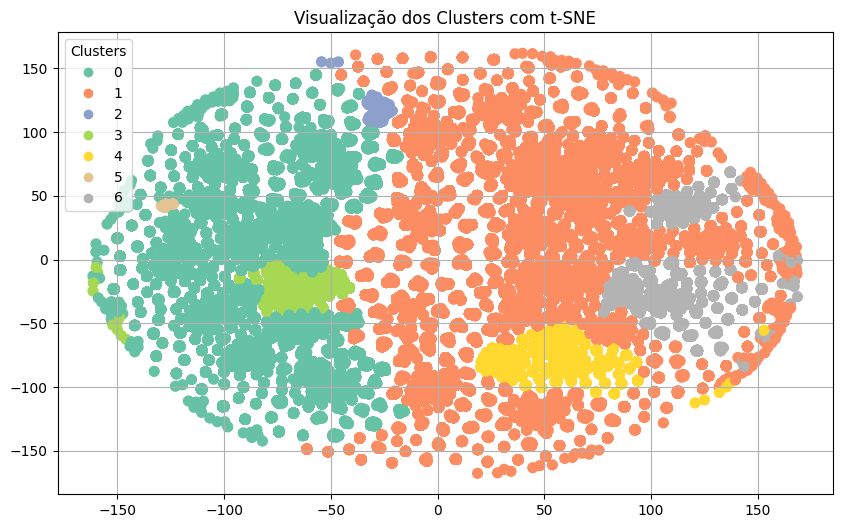

In [90]:
from sklearn.manifold import TSNE

# Reduz com t-SNE para visualização
tsne = TSNE(n_components=2, metric='hamming', perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(dados_tesouro_encoded.drop('Cluster', axis=1))

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=dados_tesouro_encoded['Cluster'], cmap='Set2', s=50)
plt.title('Visualização dos Clusters com t-SNE')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


### 3.4 Clusterização KMEANS (Unsupervised Learning)

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

NUMBER_CLUSTERS = 7

In [129]:
test = dados_tesouro_encoded.drop('Cluster', axis=1)

# normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(test)

# clusterização
kmeans = KMeans(n_clusters=NUMBER_CLUSTERS, random_state=42)
test['cluster'] = kmeans.fit_predict(X_scaled)

In [132]:
from sklearn.decomposition import PCA
import plotly.express as px

features = list(test.columns)
pca = PCA(n_components=3)
dados_pca = pca.fit_transform(test[features].values)

# Criar um novo DataFrame com os componentes
df_pca = pd.DataFrame(dados_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Clusters'] = test['cluster'].values
# Plotar com Plotly Express
fig = px.scatter_3d(df_pca,
                    x='PC1', y='PC2', z='PC3',
                    color='Clusters',
                    title='Visualização PCA 3D dos Dados tesouro direto (Padronizados) - KMEANS',
                    labels={'PC1': 'Componente Principal 1',
                            'PC2': 'Componente Principal 2',
                            'PC3': 'Componente Principal 3'})
fig.show()


#### 3.4.2 Usar t-SNE para representação mais precisa (mais lento, mas melhor visual)

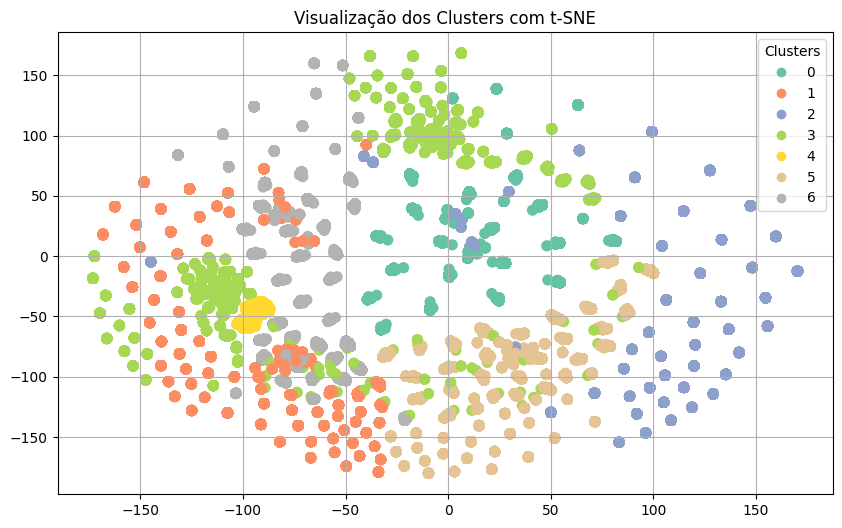

In [134]:
from sklearn.manifold import TSNE

# Reduz com t-SNE para visualização
tsne = TSNE(n_components=2, metric='hamming', perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(test.drop('cluster', axis=1))

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=test['cluster'], cmap='Set2', s=50)
plt.title('Visualização dos Clusters com t-SNE')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


In [125]:
# análise
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

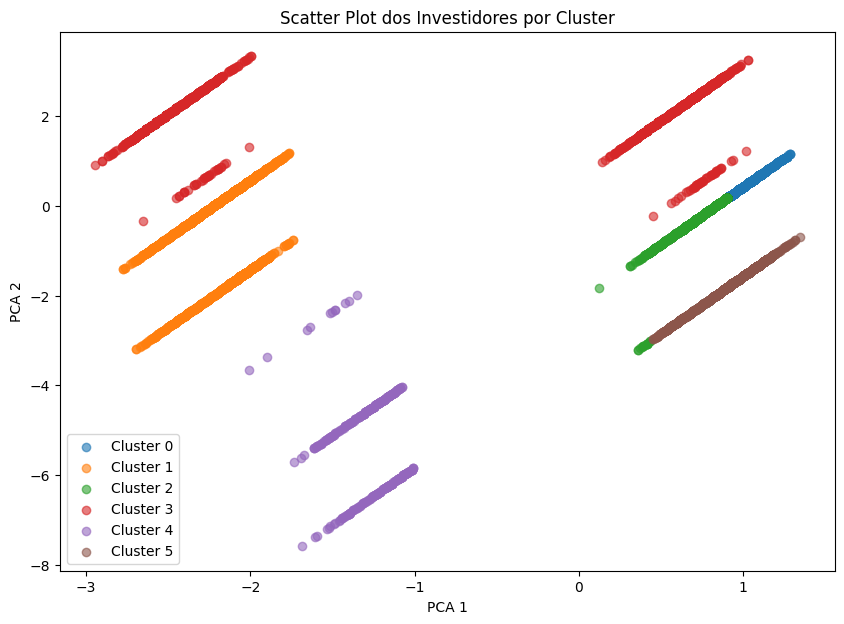

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Plotando cada cluster com uma cor diferente
for cluster in range(kmeans.n_clusters):
    plt.scatter(
        X_pca[test['cluster'] == cluster, 0],
        X_pca[test['cluster'] == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot dos Investidores por Cluster')
plt.legend()
plt.show()


### 3.5 Clusterização utilizando MiniBatchKMeans e DBSCAN

In [135]:
from sklearn.cluster import MiniBatchKMeans
import pandas as pd

# Passo 1: Converter os dados booleanos para float
df_prepared = dados_tesouro_encoded.astype(float)

# Passo 2: Aplicar MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=7, batch_size=100000, random_state=42)
labels = kmeans.fit_predict(df_prepared)

# Passo 3: Adicionar os rótulos de cluster ao DataFrame
df_prepared['Cluster'] = labels

# Exibir os primeiros resultados
print(df_prepared['Cluster'].value_counts())


Cluster
6    29190
0    22586
1    22411
3    13730
4     5202
2     4402
5     2479
Name: count, dtype: int64


In [136]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Amostragem para evitar estouro de memória
df_amostra = dados_tesouro_encoded

# Escalonamento (DBSCAN se beneficia disso)
df_scaled = StandardScaler().fit_transform(df_amostra)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

# Adiciona os rótulos
df_amostra['Cluster'] = labels

# Mostra distribuição
print(df_amostra['Cluster'].value_counts())


Cluster
 0    51775
 1    22044
 3    13730
 2     5202
 4     4362
 5     2435
 7      204
 6      160
 9       37
 8       32
-1       19
Name: count, dtype: int64


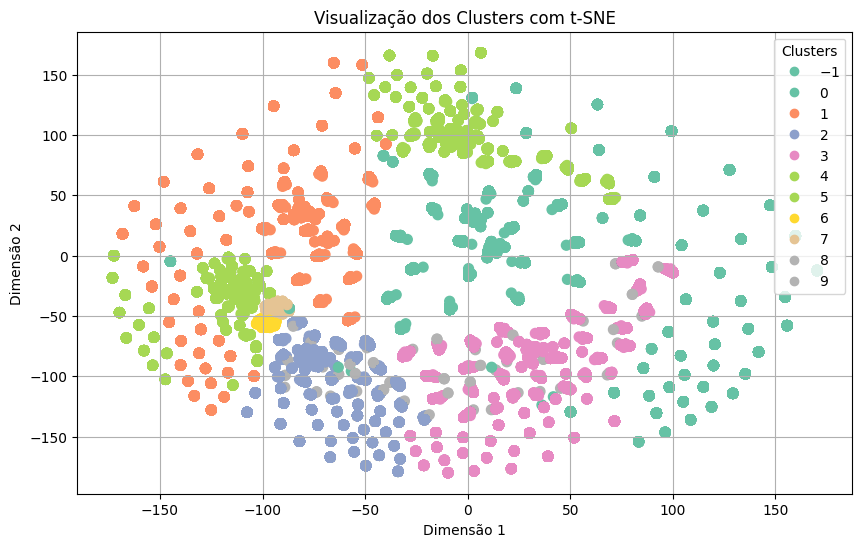

In [137]:
from sklearn.manifold import TSNE

# Reduz com t-SNE para visualização
tsne = TSNE(n_components=2, metric='hamming', perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_amostra.drop('Cluster', axis=1))

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_amostra['Cluster'], cmap='Set2', s=50)
plt.title('Visualização dos Clusters com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

#### Join Data

In [103]:
tesouro_cluster

key_0  Codigo do Investidor Data de Adesao   Estado Civil Genero  \
0      781974              41207596     30/06/2023    Solteiro(a)      M   
1      937737               6333497     04/05/2022  Desquitado(a)      F   
2      907828               2443618     28/09/2017    Solteiro(a)      F   
3      784628              40995838     16/01/2023  Desquitado(a)      M   
4      662460              22100858     19/06/2023    Solteiro(a)      M   
...       ...                   ...            ...            ...    ...   
99995   80809              14838085     21/11/2022    Solteiro(a)      M   
99996  671949              22058607     23/08/2021    Solteiro(a)      M   
99997  499176               6319933     06/12/2021  Desquitado(a)      M   
99998  862817              31864798     19/04/2022    Solteiro(a)      M   
99999  435719              10715717     01/01/1900    Solteiro(a)      M   

                                     Profissao  Idade UF do Investidor  \
0                                       OUTROS     28               RS   
1                                       OUTROS     28               SP   
2                                       OUTROS     35               BA   
3                                       OUTROS     55               SP   
4        AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS     24               SP   
...                                        ...    ...              ...   
99995                            ADMINISTRADOR     30               SP   
99996                                   OUTROS     25               MG   
99997  APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)     60               RJ   
99998                              PENSIONISTA     21               RJ   
99999                                   OUTROS     32               BA   

         Cidade do Investidor Pais do Investidor  ...  \
0                  SANTA ROSA             BRASIL  ...   
1                      OSASCO             BRASIL  ...   
2                    SALVADOR             BRASIL  ...   
3                     JACAREI             BRASIL  ...   
4             ITAQUAQUECETUBA             BRASIL  ...   
...                       ...                ...  ...   
99995         MOGI DAS CRUZES             BRASIL  ...   
99996             SANTA LUZIA             BRASIL  ...   
99997          RIO DE JANEIRO             BRASIL  ...   
99998          RIO DE JANEIRO             BRASIL  ...   
99999  LUIS EDUARDO MAGALHAES             BRASIL  ...   

      Macrogrupo_Profissao_Educação, Ciência e Pesquisa  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
99995                                               0.0   
99996                                               0.0   
99997                                               0.0   
99998                                               0.0   
99999                                               0.0   

      Macrogrupo_Profissao_Engenharia, Tecnologia e Produção  \
0                                                    0.0       
1                                                    0.0       
2                                                    0.0       
3                                                    0.0       
4                                                    0.0       
...                                                  ...       
99995                                                0.0       
99996                                                0.0       
99997                                                0.0       
99998                                                0.0       
99999                                                0.0       

      Macrogrupo_Profissao_Esporte Macrogru

In [114]:
tesouro_cluster = pd.DataFrame()
# Lista de colunas de dados_tesouro_encoded, exceto 'cluster'
colunas_para_dropar = [col for col in dados_tesouro_encoded.columns if col != 'Cluster']

dados_tesouro_encoded_drop = dados_tesouro_encoded.drop(columns=colunas_para_dropar)

# Fazendo o merge
tesouro_cluster = dados_tesouro.merge(
    dados_tesouro_encoded_drop, 
    left_on=dados_tesouro.index, 
    right_on=dados_tesouro_encoded_drop.index, 
    how='left'
)

# Dropando as colunas
# dados_finais_idh = tesouro_cluster.drop(columns=colunas_para_dropar)
tesouro_cluster_final = tesouro_cluster.drop(columns=['Codigo do Investidor', 'Grupo_Profissao', 'Idade'])

In [117]:
tesouro_cluster_final.head()

key_0 Data de Adesao   Estado Civil Genero  \
0  781974     30/06/2023    Solteiro(a)      M   
1  937737     04/05/2022  Desquitado(a)      F   
2  907828     28/09/2017    Solteiro(a)      F   
3  784628     16/01/2023  Desquitado(a)      M   
4  662460     19/06/2023    Solteiro(a)      M   

                               Profissao UF do Investidor  \
0                                 OUTROS               RS   
1                                 OUTROS               SP   
2                                 OUTROS               BA   
3                                 OUTROS               SP   
4  AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS               SP   

  Cidade do Investidor Pais do Investidor Situacao da Conta Operou 12 Meses  \
0           SANTA ROSA             BRASIL                 A               N   
1               OSASCO             BRASIL                 A               N   
2             SALVADOR             BRASIL                 D               N   
3              JACAREI             BRASIL                 D               N   
4      ITAQUAQUECETUBA             BRASIL                 A               N   

           Faixa Etária        Macrogrupo_Profissao  Cluster  
0  Adulto jovem 18 - 29                      Outros        1  
1  Adulto jovem 18 - 29                      Outros        0  
2        Adulto 30 - 59                      Outros        0  
3        Adulto 30 - 59                      Outros        1  
4  Adulto jovem 18 - 29  Serviços Gerais e Técnicos        1

In [120]:
tesouro_cluster_final.Cluster.unique()

array([1, 0, 6, 3, 4, 2, 5])

In [121]:
tesouro_cluster_final.to_parquet("./data/to_classify/sample_data_cluster.parquet")